# # PART 3 PROBLEMS

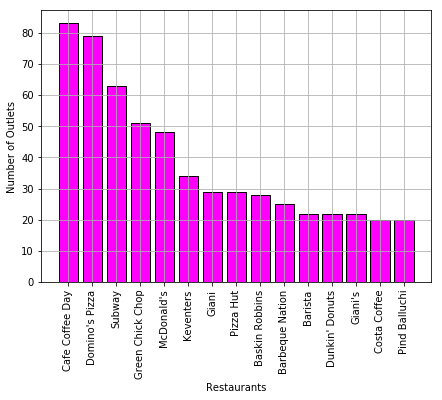

In [11]:
#1 Plot the bar graph top 15 restaurants have a maximum number of outlets.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data = pd.read_csv('zomato.csv',encoding ="latin-1")
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
data = df['Restaurant Name'].value_counts()[:15]
res = data.index
count = data.values
plt.figure(figsize =(7, 5))
plt.bar(res,count,color= 'magenta',edgecolor = 'black')
plt.grid()
plt.xlabel('Restaurants')
plt.ylabel('Number of Outlets')
plt.xticks(rotation = 90)
plt.show()

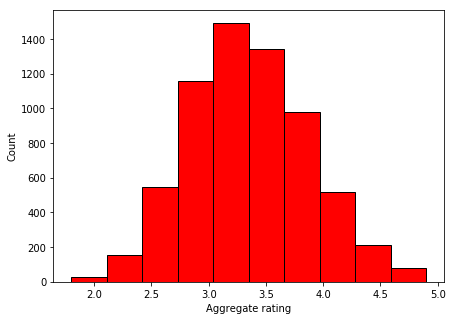

In [16]:
#Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
df= csv_data.copy()
df.dropna(subset = ['Aggregate rating'],inplace = True)
df = df[df['Aggregate rating'] !=0]
rc= df['Aggregate rating'].values
plt.figure(figsize =(7, 5))
plt.hist(rc,edgecolor = 'black',color ='red')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

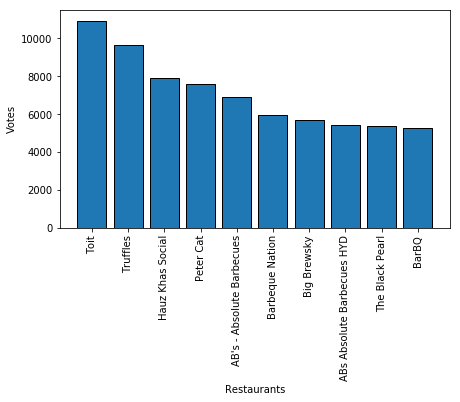

In [19]:
# Plot the bar graph top 10 restaurants in the data with the highest number of votes.
df= csv_data.copy()
df.sort_values('Votes',axis =0 ,ascending = False,inplace =True)
df = df[:10]
df.iloc[0,0] =225
df.iloc[7,1] =  "ABs Absolute Barbecues HYD"
plt.figure(figsize =(7, 4))
plt.bar(df['Restaurant Name'].values,df['Votes'].values,edgecolor ='black')
plt.xlabel('Restaurants')
plt.ylabel('Votes')
plt.xticks(rotation = 90)

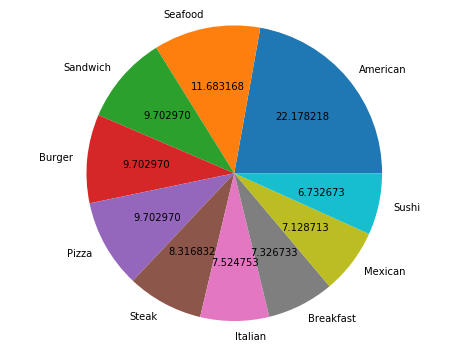

In [95]:
#Plot the pie graph of top 10 cuisines present in restaurants in the USA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data = pd.read_csv('zomato.csv',encoding ="latin-1")
csv_data  = csv_data[csv_data["Country Code"]== 216]
df = csv_data.copy()
cus = []
df.dropna(subset = ['Cuisines'],inplace  =True)
def cur(s) : 
    for j in s.split(',') :
        cus.append(j.strip())
    return s
df['Cuisines'] = df['Cuisines'].apply(cur)
data = pd.DataFrame(cus)
rc =data[0].value_counts()[:10]
cusine = rc.index
count = rc.values
plt.figure(figsize =(8, 6))
plt.pie(count,labels = cusine,autopct = "%2f")
plt.axis('equal')
plt.show()

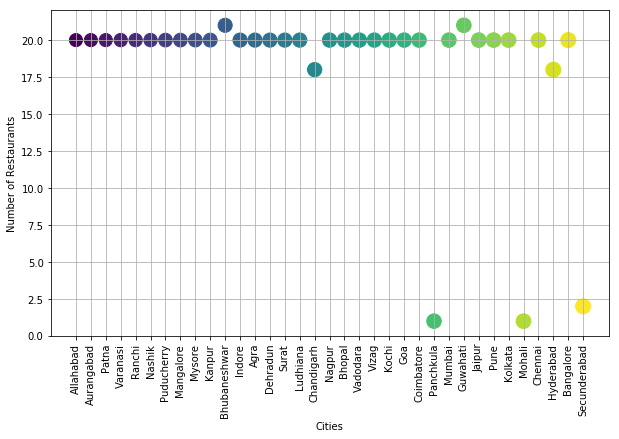

,city,Weighted Rating,Restaurants count
2,Allahabad,3.41,20
4,Aurangabad,3.43,20
34,Patna,3.46,20
41,Varanasi,3.56,20
37,Ranchi,3.57,20
30,Nashik,3.59,20
35,Puducherry,3.74,20
25,Mangalore,3.76,20
28,Mysore,3.76,20
20,Kanpur,3.85,20


In [22]:
# Plot the bubble graph of a number of Restaurants
#present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

df = csv_data.copy()
def crp(s) :
    return s.strip()
df['City'] = df['City'].apply(crp)
res = df.groupby('City')
df['weight1'] =  df['Aggregate rating']*df['Votes']
top_loc, weight , = [] , []
res_count  = []
df.dropna(subset = ['Aggregate rating','Votes'],inplace = True)
for cit , data in res :
      #top_loc.append(loc)
      res_count.append(data.shape[0])
      if data['Votes'].sum() != 0 :
        top_loc.append(cit)
        weight.append(round(data['weight1'].sum()/data['Votes'].sum(),2))
#print(sorted(weight))
dp = {'city':top_loc, 'Weighted Rating':weight,'Restaurants count': res_count}
w_res = pd.DataFrame(dp)
w_res.sort_values('Restaurants count',axis =0 ,inplace =True)
w_res = w_res[:35]
colors = np.arange(len(w_res['city'].values))
w_res.sort_values('Weighted Rating',axis =0 ,inplace =True)
plt.figure(figsize =(10, 6))
plt.scatter(w_res['city'].values, w_res['Restaurants count'].values, s=w_res['Weighted Rating'].values*50, c=colors)
plt.xticks(rotation =90)
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.grid()
plt.show()
w_res